# Walmat Sales Data

In [1]:
# Essentials
import pandas as pd

# Charting
import matplotlib.pyplot as plt



In [2]:
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [3]:
df_stores= pd.read_csv('../../data/stores.csv')
df_features= pd.read_csv('../../data/features.csv')
df_samplesubmission= pd.read_csv('../../data/samplesubmission.csv')
df_test= pd.read_csv('../../data/test.csv')
df_train= pd.read_csv('../../data/train.csv')

### Basic Data Exploration

In [4]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [6]:
df_train.duplicated().sum()

0

In [7]:
df_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [8]:
df_stores.duplicated().sum()

0

In [9]:
df_features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [10]:
df_features.duplicated().sum()

0

In [11]:
df_features[['Store', 'Date', 'CPI', 'Unemployment']]

,Store,Date,CPI,Unemployment
0,1,2010-02-05,211.096358,8.106
1,1,2010-02-12,211.242170,8.106
2,1,2010-02-19,211.289143,8.106
3,1,2010-02-26,211.319643,8.106
4,1,2010-03-05,211.350143,8.106
...,...,...,...,...
8185,45,2013-06-28,NaN,NaN
8186,45,2013-07-05,NaN,NaN
8187,45,2013-07-12,NaN,NaN
8188,45,2013-07-19,NaN,NaN


In [12]:
# Filter the rows where CPI or Unemployment are null
null_cpi_unemployment = df_features[df_features['CPI'].isnull() | df_features['Unemployment'].isnull()]

# Display the rows with missing values in CPI or Unemployment
print(null_cpi_unemployment[['Date', 'CPI', 'Unemployment']].sort_values('Date'))

            Date  CPI  Unemployment
169   2013-05-03  NaN           NaN
715   2013-05-03  NaN           NaN
5083  2013-05-03  NaN           NaN
3263  2013-05-03  NaN           NaN
5265  2013-05-03  NaN           NaN
...          ...  ...           ...
5095  2013-07-26  NaN           NaN
3093  2013-07-26  NaN           NaN
1273  2013-07-26  NaN           NaN
4913  2013-07-26  NaN           NaN
8189  2013-07-26  NaN           NaN

[585 rows x 3 columns]


**The above null values are in the test data.** 

In [13]:
df_features[['Store', 'Date', 'CPI', 'Unemployment']]

,Store,Date,CPI,Unemployment
0,1,2010-02-05,211.096358,8.106
1,1,2010-02-12,211.242170,8.106
2,1,2010-02-19,211.289143,8.106
3,1,2010-02-26,211.319643,8.106
4,1,2010-03-05,211.350143,8.106
...,...,...,...,...
8185,45,2013-06-28,NaN,NaN
8186,45,2013-07-05,NaN,NaN
8187,45,2013-07-12,NaN,NaN
8188,45,2013-07-19,NaN,NaN


In [14]:
cpi_unemployment = df_features[['Store', 'Date', 'CPI', 'Unemployment']].copy()

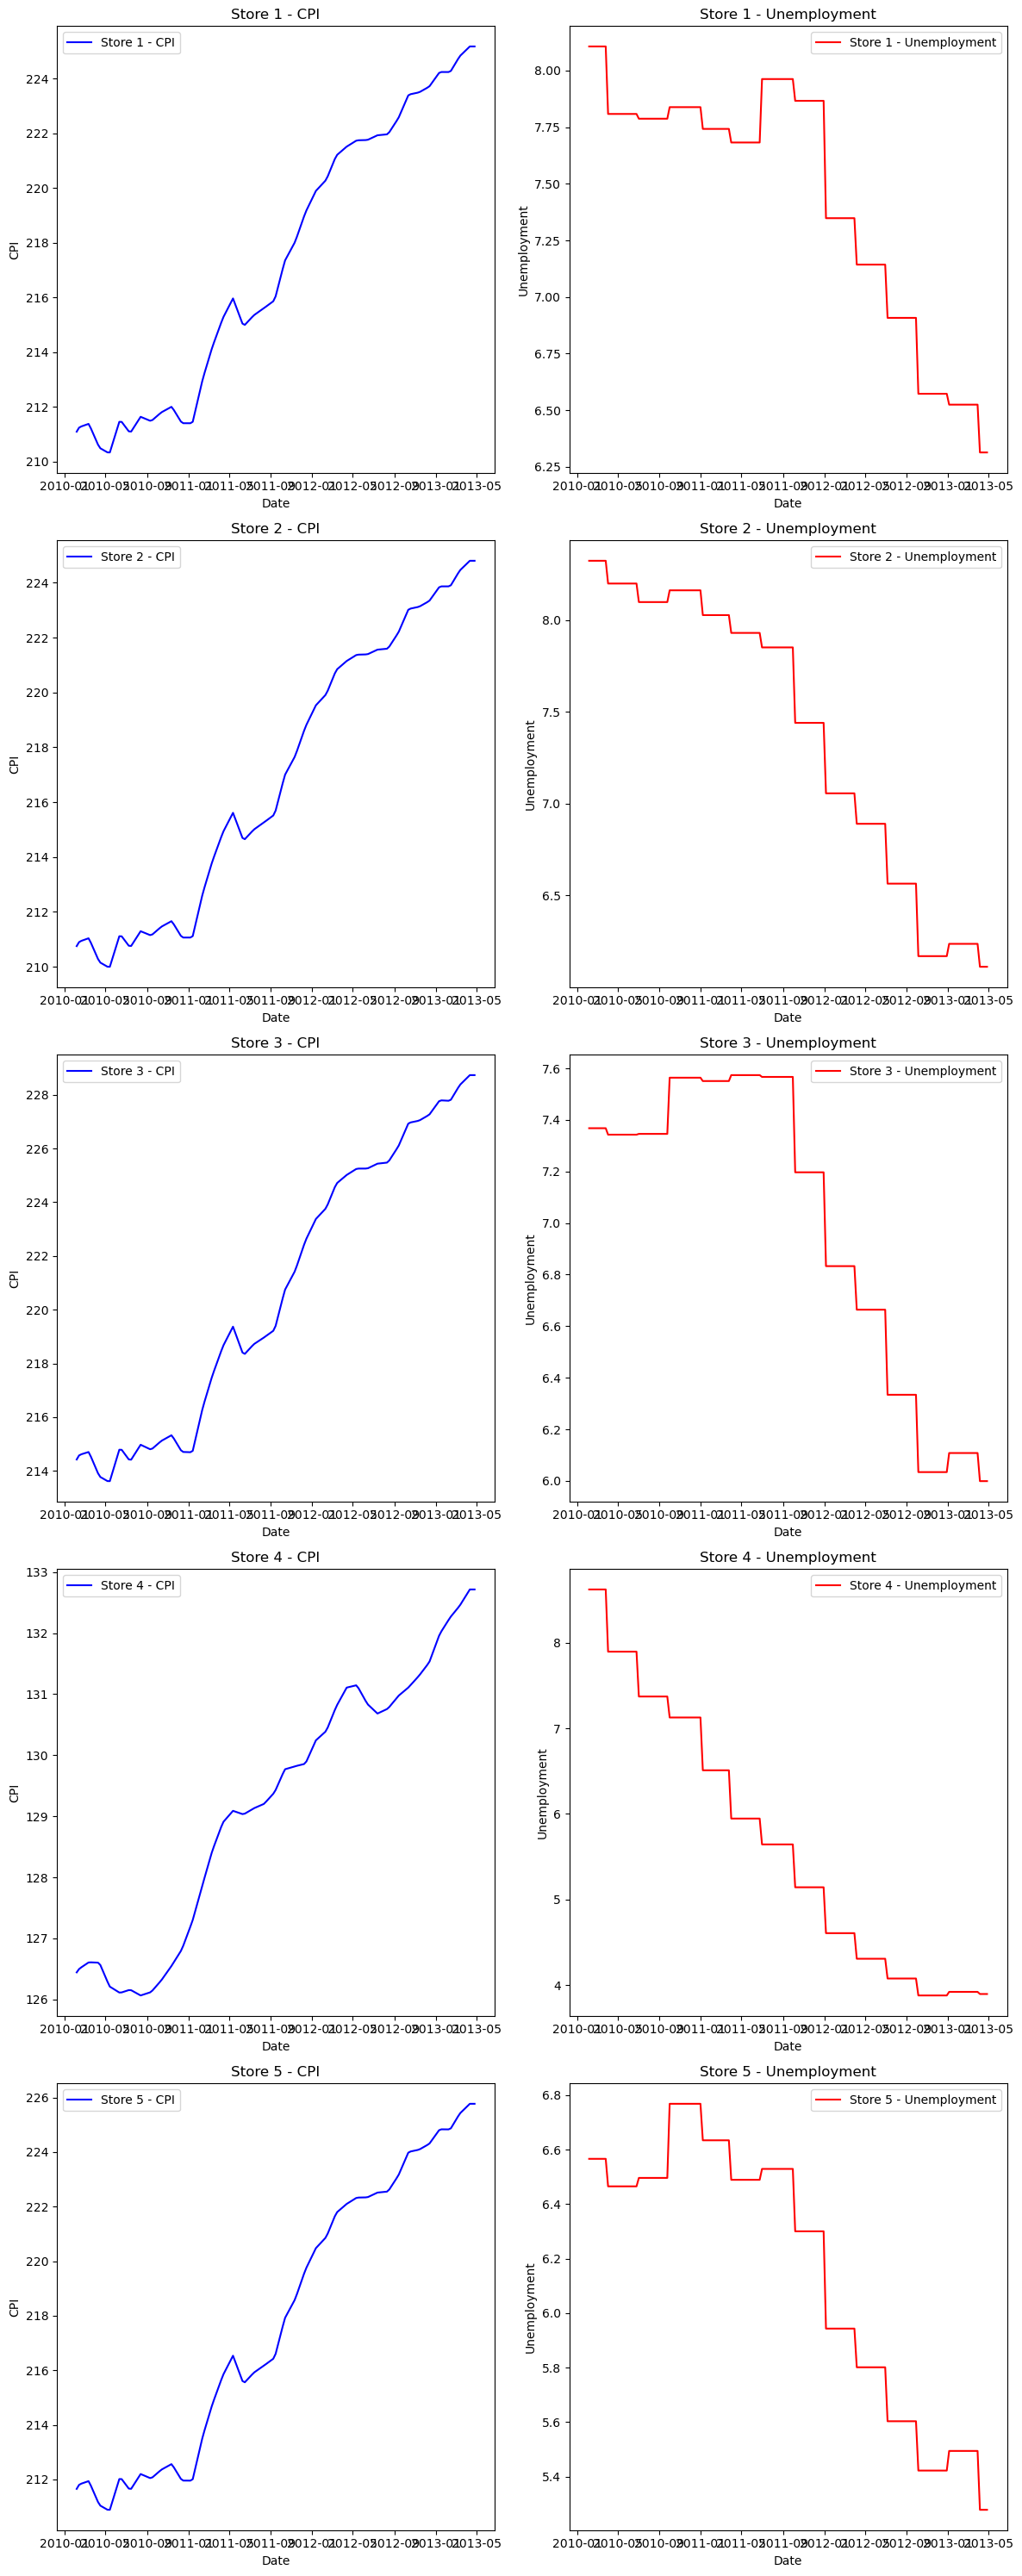

In [15]:
# Ensure the 'Date' column is in datetime format
cpi_unemployment['Date'] = pd.to_datetime(cpi_unemployment['Date'])

# Select the first 5 stores
selected_stores = cpi_unemployment['Store'].unique()[:5]

# Set up the plot for the selected stores
fig, axes = plt.subplots(len(selected_stores), 2, figsize=(12, len(selected_stores) * 6))

for i, store in enumerate(selected_stores):
    store_data = cpi_unemployment[cpi_unemployment['Store'] == store]
    
    # Plot CPI for the current store
    axes[i, 0].plot(store_data['Date'], store_data['CPI'], label=f"Store {store} - CPI", color='blue')
    axes[i, 0].set_title(f"Store {store} - CPI")
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('CPI')
    axes[i, 0].legend()
    
    # Plot Unemployment for the current store
    axes[i, 1].plot(store_data['Date'], store_data['Unemployment'], label=f"Store {store} - Unemployment", color='red')
    axes[i, 1].set_title(f"Store {store} - Unemployment")
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('Unemployment')
    axes[i, 1].legend()

# Adjust the layout to prevent overlapping labels
plt.tight_layout()
plt.show()

In [16]:
cpi_unemployment.sort_values('Date').head(20)

,Store,Date,CPI,Unemployment
0,1,2010-02-05,211.096358,8.106
2730,16,2010-02-05,189.381697,7.039
5460,31,2010-02-05,210.752605,8.324
3640,21,2010-02-05,210.752605,8.324
4550,26,2010-02-05,131.527903,8.488
7280,41,2010-02-05,189.381697,7.541
2548,15,2010-02-05,131.527903,8.350
5642,32,2010-02-05,189.381697,9.014
910,6,2010-02-05,212.622352,7.259
3458,20,2010-02-05,204.247194,8.187


CPI and Unemployment values are different for each store location.

In [17]:
df_train.sort_values(by=['Store', 'Dept', 'Date'])

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [18]:
df_train['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [19]:
df_train['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [20]:
df_train.loc[(df_train['Store']==20)]

,Store,Dept,Date,Weekly_Sales,IsHoliday
187335,20,1,2010-02-05,46021.21,False
187336,20,1,2010-02-12,52734.17,True
187337,20,1,2010-02-19,55649.79,False
187338,20,1,2010-02-26,36805.42,False
187339,20,1,2010-03-05,41206.78,False
...,...,...,...,...,...
197544,20,99,2012-09-07,0.67,True
197545,20,99,2012-09-14,0.05,False
197546,20,99,2012-09-21,29.91,False
197547,20,99,2012-10-05,660.00,False


In [21]:
df_train.loc[(df_train['Store']==20) & (df_train['Dept']==2)]

,Store,Dept,Date,Weekly_Sales,IsHoliday
187478,20,2,2010-02-05,85812.69,False
187479,20,2,2010-02-12,67951.33,True
187480,20,2,2010-02-19,78321.16,False
187481,20,2,2010-02-26,72410.12,False
187482,20,2,2010-03-05,81139.43,False
...,...,...,...,...,...
187616,20,2,2012-09-28,73371.54,False
187617,20,2,2012-10-05,82981.54,False
187618,20,2,2012-10-12,75563.24,False
187619,20,2,2012-10-19,72108.34,False


In [22]:
df_train.loc[(df_train['Store']==20) & (df_train['Dept']==1)]

,Store,Dept,Date,Weekly_Sales,IsHoliday
187335,20,1,2010-02-05,46021.21,False
187336,20,1,2010-02-12,52734.17,True
187337,20,1,2010-02-19,55649.79,False
187338,20,1,2010-02-26,36805.42,False
187339,20,1,2010-03-05,41206.78,False
...,...,...,...,...,...
187473,20,1,2012-09-28,32609.37,False
187474,20,1,2012-10-05,40771.47,False
187475,20,1,2012-10-12,41280.48,False
187476,20,1,2012-10-19,40958.43,False


In [45]:
len(df_train.loc[(df_train['Store']==20) & (df_train['Dept']==1)])

143

In [23]:
store_list = df_train['Store'].unique()
len(store_list)

45

In [24]:
dept_list = df_train['Dept'].unique()
len(dept_list)

81

- The training file contains store, department, weekly sales and holiday indicator.
- The test file also contains store, department, weekly sales and holiday indicator but on different date range.
- The store file contains store information such as store type and store size
- The feature files contains additional features including both training and test date range. 
- There are some missing values on the column `MarkDown1`, `MarkDown2`, `MarkDown3`, `MarkDown4`, and `MarkDown5`. We need to set those field without any markdown to 0.
- The other 2 columns containing missing values are `CPI` and `Unemployment`. These data are region specific. Each stores CPI and Unemployment number is different. We will use rolling average of 12 weeks to impute the missing data.
- Time Series is organized by Store and Dept. So we need multi-level-index.

### Action Plan

- Denormalize/Merge store file and features files into the training dataset. Set those field without any markdown as 0.
- Denormalize/Merge store file and features files into the test dataset. Set those field without any markdown as 0. Impute the missing CPI and Unemployment data with 12 weeks rolling mean. 

### Denormalize Training Data

In [25]:
df_train_full = df_train.merge(df_stores, on='Store')
df_train_full = df_train_full.merge(df_features, on=['Store', 'Date'])

In [26]:
df_train_full

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [27]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [28]:
df_train_full.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [29]:
df_train_full.duplicated().sum()

0

In [30]:
# Assuming df is your dataset with columns 'Markdown1', 'Markdown2', ..., 'Markdown5'
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Set missing values in markdown columns to 0 in the training dataset
df_train_full[markdown_columns] = df_train_full[markdown_columns].fillna(0)

In [31]:
# Create a dictionary to map Store_Type to ordinal values
store_type_map = {'A': 1, 'B': 2, 'C': 3}

# Apply the map function to convert Store_Type to ordinal values
df_train_full['Store_Type_Ordinal'] = df_train_full['Type'].map(store_type_map)

# Drop the original 'Type' column after mapping
df_train_full.drop(columns=['Type'], inplace=True)

In [32]:
df_train_full.isnull().sum()

Store                 0
Dept                  0
Date                  0
Weekly_Sales          0
IsHoliday_x           0
Size                  0
Temperature           0
Fuel_Price            0
MarkDown1             0
MarkDown2             0
MarkDown3             0
MarkDown4             0
MarkDown5             0
CPI                   0
Unemployment          0
IsHoliday_y           0
Store_Type_Ordinal    0
dtype: int64

In [33]:
# Check if the two columns are identical
if df_train_full['IsHoliday_x'].equals(df_train_full['IsHoliday_y']):
    # If the columns are identical, drop one of them
    df_train_full.drop('IsHoliday_y', axis=1, inplace=True)
    print("Columns are identical. 'IsHoliday_y' has been dropped.")
else:
    print("Columns are not identical. No column was dropped.")

Columns are identical. 'IsHoliday_y' has been dropped.


### Denormalize Test Data

In [34]:
df_test_full = df_test.merge(df_stores, on='Store')
df_test_full = df_test_full.merge(df_features, on=['Store', 'Date'])

In [35]:
df_test_full.duplicated().sum()

0

In [36]:
df_test_full.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday_x         0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
IsHoliday_y         0
dtype: int64

In [37]:
# Set missing values in markdown columns to 0 in the training dataset
df_test_full[markdown_columns] = df_test_full[markdown_columns].fillna(0)

In [38]:
df_test_full.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday_x         0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI             38162
Unemployment    38162
IsHoliday_y         0
dtype: int64

In [39]:
# Define a rolling window size (e.g., using the last 12 weeks of data)
rolling_window_size = 12  # You can adjust the window size as needed

# Function to apply rolling mean for imputation
def rolling_mean_imputation(store_data, col_name, window_size):
    # Calculate the rolling mean on the data (previous test data for each store)
    store_data[f'{col_name}_rolling'] = store_data[col_name].rolling(window=window_size, min_periods=1).mean()
    
    # Impute missing values using the rolling mean (the most recent rolling mean for the test set)
    store_data[col_name] = store_data[col_name].fillna(store_data[f'{col_name}_rolling'])
    
    return store_data

# Check if there are missing values before imputation
print("Missing values in original df_test_full before imputation:")
print(df_test_full[['CPI', 'Unemployment']].isnull().sum())

# Impute missing values for CPI and Unemployment in the test set
for store in df_test_full['Store'].unique():
    # Get the subset for the store in df_test_full
    store_data = df_test_full[df_test_full['Store'] == store].copy()  # Make a copy to avoid the SettingWithCopyWarning
    
    # Impute CPI using rolling mean
    store_data = rolling_mean_imputation(store_data, 'CPI', rolling_window_size)
    
    # Impute Unemployment using rolling mean
    store_data = rolling_mean_imputation(store_data, 'Unemployment', rolling_window_size)
    
    # Forward fill the remaining missing values (if any)
    store_data['CPI'] = store_data['CPI'].ffill()
    store_data['Unemployment'] = store_data['Unemployment'].ffill()
    
    # Update the df_test_full dataset with the imputed values
    df_test_full.loc[df_test_full['Store'] == store, 'CPI'] = store_data['CPI']
    df_test_full.loc[df_test_full['Store'] == store, 'Unemployment'] = store_data['Unemployment']

# Check if there are any remaining missing values after imputation
print("\nMissing values in df_test_full after imputation:")
print(df_test_full[['CPI', 'Unemployment']].isnull().sum())


Missing values in original df_test_full before imputation:
CPI             38162
Unemployment    38162
dtype: int64

Missing values in df_test_full after imputation:
CPI             0
Unemployment    0
dtype: int64


In [40]:
# Apply the map function to convert Store_Type to ordinal values
df_test_full['Store_Type_Ordinal'] = df_test_full['Type'].map(store_type_map)

# Drop the original 'Type' column after mapping
df_test_full.drop(columns=['Type'], inplace=True)

In [41]:
df_test_full.isnull().sum()

Store                 0
Dept                  0
Date                  0
IsHoliday_x           0
Size                  0
Temperature           0
Fuel_Price            0
MarkDown1             0
MarkDown2             0
MarkDown3             0
MarkDown4             0
MarkDown5             0
CPI                   0
Unemployment          0
IsHoliday_y           0
Store_Type_Ordinal    0
dtype: int64

In [42]:
# Check if the two columns are identical
if df_test_full['IsHoliday_x'].equals(df_test_full['IsHoliday_y']):
    # If the columns are identical, drop one of them
    df_test_full.drop('IsHoliday_y', axis=1, inplace=True)
    print("Columns are identical. 'IsHoliday_y' has been dropped.")
else:
    print("Columns are not identical. No column was dropped.")


Columns are identical. 'IsHoliday_y' has been dropped.


In [43]:
df_test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Store               115064 non-null  int64  
 1   Dept                115064 non-null  int64  
 2   Date                115064 non-null  object 
 3   IsHoliday_x         115064 non-null  bool   
 4   Size                115064 non-null  int64  
 5   Temperature         115064 non-null  float64
 6   Fuel_Price          115064 non-null  float64
 7   MarkDown1           115064 non-null  float64
 8   MarkDown2           115064 non-null  float64
 9   MarkDown3           115064 non-null  float64
 10  MarkDown4           115064 non-null  float64
 11  MarkDown5           115064 non-null  float64
 12  CPI                 115064 non-null  float64
 13  Unemployment        115064 non-null  float64
 14  Store_Type_Ordinal  115064 non-null  int64  
dtypes: bool(1), float64(9), int64(4), 

In [44]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Store               421570 non-null  int64  
 1   Dept                421570 non-null  int64  
 2   Date                421570 non-null  object 
 3   Weekly_Sales        421570 non-null  float64
 4   IsHoliday_x         421570 non-null  bool   
 5   Size                421570 non-null  int64  
 6   Temperature         421570 non-null  float64
 7   Fuel_Price          421570 non-null  float64
 8   MarkDown1           421570 non-null  float64
 9   MarkDown2           421570 non-null  float64
 10  MarkDown3           421570 non-null  float64
 11  MarkDown4           421570 non-null  float64
 12  MarkDown5           421570 non-null  float64
 13  CPI                 421570 non-null  float64
 14  Unemployment        421570 non-null  float64
 15  Store_Type_Ordinal  421570 non-nul

This notebook contain code to denormalized the training data and the test data. We also impute the missing CPI and unemployment figure on the test dataset. This is designed for competition used.

For non-competition purpose, we need a known sales data as our test dataset.In such case, we can ignore the test data.

Notes:

1. AutoARIMA/SARIMA and ETS is only used for forecasting with one variable, which is the target.
2. ETS is more suitable for long term trend with clear seasonality.
3. SARIMA can work but need fine tuning.
4. ARIMA/SARIMA can also be used by grid search for fine tuning.
5. ETS can also apply using grid search.
6. Need to test robustness of model using time windows cross validation.
7. PMDARIMA implements ARIMAX, which means it can use ARIMA with additional features. The AutoARIMA can help to get best model.
8. We can also use feature engineering to shift(lag) or rolling(window) means to fit into traditional regression model such as decision tree or gradient boosting regressor.
9. Train test split is done differently. We can use `temporal_train_test_split` or we can manually cut the series.
10. Be careful of data leakage
11. We do feature engineering first then split and then break the target.


Choosing “the best”

Situation	Recommended approach

Small hierarchy (< 100 series)	Bottom-up ETS / ARIMA + simple aggregate

Medium hierarchy (100–500 series)	Bottom-up + MinT reconciliation (sktime or scikit-hts)

Large hierarchy (500+ series)	Global deep/ML model (N-BEATS, DeepAR), then reconcile

Multiple seasonalities (daily + weekly + yearly)	TBATS / MSTL at bottom level or global deep models

A quick rule of thumb
“How many series?”

If you can fit them one-by-one, bottom-up works.

Otherwise, go global or reconcile.

“Do I need additivity/coherence?”

Yes → use a hierarchical reconciliation method.

“Am I seeing multiple season lengths?”

Yes → consider TBATS or MSTL, or a global deep model built for multi-seasonality.